In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# GLOBALS
LOCAL_ROOT = '/Users/lenovo/Documents/ExternalTest/Zendrive/'
RAW_DIR = os.path.join(LOCAL_ROOT, 'raw_data')
INTER_DIR = os.path.join(LOCAL_ROOT, 'inter_data')
MODEL_DIR = os.path.join(LOCAL_ROOT, 'model')
GPS_FN = os.path.join(RAW_DIR, 'gps_test.csv')
MOTION_FN = os.path.join(RAW_DIR, 'motion_test.csv')

In [7]:
# read gps data
motion_df = pd.read_csv(MOTION_FN)

print(motion_df.shape)
motion_df.head()

(14671, 13)


,Unnamed: 0,timestamp,proximity,driver_id,pitch,gyroscope_y,gyroscope_x,gyroscope_z,acceleration_z,acceleration_y,acceleration_x,yaw,roll
0,1,1475693909361,-1,NzUxNWQwMjBk,0.040626,-0.028548,-0.008259,-0.001406,-0.183663,0.264476,0.326080,1.583115,0.747436
1,2,1475693909541,-1,NzUxNWQwMjBk,-0.439603,-0.018676,0.002345,0.004972,-0.368844,0.235645,-0.011001,2.124577,0.646496
2,3,1475693909721,-1,NzUxNWQwMjBk,-0.448445,0.004903,-0.017983,-0.003556,0.112644,0.226058,0.180560,2.116543,0.655507
3,4,1475693909901,-1,NzUxNWQwMjBk,-0.455960,0.009423,0.004332,-0.006797,-0.004901,0.102609,0.219669,2.109604,0.657661
4,5,1475693910082,-1,NzUxNWQwMjBk,-0.460388,-0.004245,0.011762,-0.006854,-0.065030,0.098155,0.217536,2.105369,0.662631


In [8]:
motion_df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
print('# drivers: %d' % (motion_df['driver_id'].nunique()))

# drivers: 1


In [10]:
motion_df['timestamp'] = pd.to_datetime(motion_df['timestamp'], unit='ms')
motion_df.head()

,timestamp,proximity,driver_id,pitch,gyroscope_y,gyroscope_x,gyroscope_z,acceleration_z,acceleration_y,acceleration_x,yaw,roll
0,2016-10-05 18:58:29.361,-1,NzUxNWQwMjBk,0.040626,-0.028548,-0.008259,-0.001406,-0.183663,0.264476,0.326080,1.583115,0.747436
1,2016-10-05 18:58:29.541,-1,NzUxNWQwMjBk,-0.439603,-0.018676,0.002345,0.004972,-0.368844,0.235645,-0.011001,2.124577,0.646496
2,2016-10-05 18:58:29.721,-1,NzUxNWQwMjBk,-0.448445,0.004903,-0.017983,-0.003556,0.112644,0.226058,0.180560,2.116543,0.655507
3,2016-10-05 18:58:29.901,-1,NzUxNWQwMjBk,-0.455960,0.009423,0.004332,-0.006797,-0.004901,0.102609,0.219669,2.109604,0.657661
4,2016-10-05 18:58:30.082,-1,NzUxNWQwMjBk,-0.460388,-0.004245,0.011762,-0.006854,-0.065030,0.098155,0.217536,2.105369,0.662631


In [23]:
start = motion_df.loc[0, 'timestamp']
motion_df['time_diff'] = motion_df['timestamp'].apply(lambda x: int(((x - start).total_seconds())*1000))
motion_df.head(10)

,timestamp,proximity,driver_id,pitch,gyroscope_y,gyroscope_x,gyroscope_z,acceleration_z,acceleration_y,acceleration_x,yaw,roll,time_diff
0,2016-10-05 18:58:29.361,-1,NzUxNWQwMjBk,0.040626,-0.028548,-0.008259,-0.001406,-0.183663,0.264476,0.326080,1.583115,0.747436,0
1,2016-10-05 18:58:29.541,-1,NzUxNWQwMjBk,-0.439603,-0.018676,0.002345,0.004972,-0.368844,0.235645,-0.011001,2.124577,0.646496,180
2,2016-10-05 18:58:29.721,-1,NzUxNWQwMjBk,-0.448445,0.004903,-0.017983,-0.003556,0.112644,0.226058,0.180560,2.116543,0.655507,360
3,2016-10-05 18:58:29.901,-1,NzUxNWQwMjBk,-0.455960,0.009423,0.004332,-0.006797,-0.004901,0.102609,0.219669,2.109604,0.657661,540
4,2016-10-05 18:58:30.082,-1,NzUxNWQwMjBk,-0.460388,-0.004245,0.011762,-0.006854,-0.065030,0.098155,0.217536,2.105369,0.662631,721
5,2016-10-05 18:58:30.262,-1,NzUxNWQwMjBk,-0.462621,-0.004054,-0.008719,-0.004735,-0.065838,0.049877,0.087375,2.103433,0.665656,901
6,2016-10-05 18:58:30.442,-1,NzUxNWQwMjBk,-0.464850,-0.023115,0.002937,0.008028,-0.309028,0.184527,0.057348,2.100889,0.668912,1081
7,2016-10-05 18:58:30.622,-1,NzUxNWQwMjBk,-0.470144,-0.003803,0.007173,0.003806,0.012960,0.487709,0.392957,2.095628,0.677464,1261
8,2016-10-05 18:58:30.802,-1,NzUxNWQwMjBk,-0.482963,-0.015372,0.004077,0.013357,-0.102762,0.333872,0.252318,2.082738,0.696139,1441
9,2016-10-05 18:58:30.983,-1,NzUxNWQwMjBk,-0.492370,0.001711,-0.009629,-0.013311,0.063915,0.321100,0.340512,2.072859,0.712420,1622


In [58]:
np.unique(np.diff(motion_df['time_diff'].values))

array([179, 180, 181, 199, 200, 201, 202], dtype=int64)

Text(0.5,1,u'Scatter plot of Acceleration and trip time')

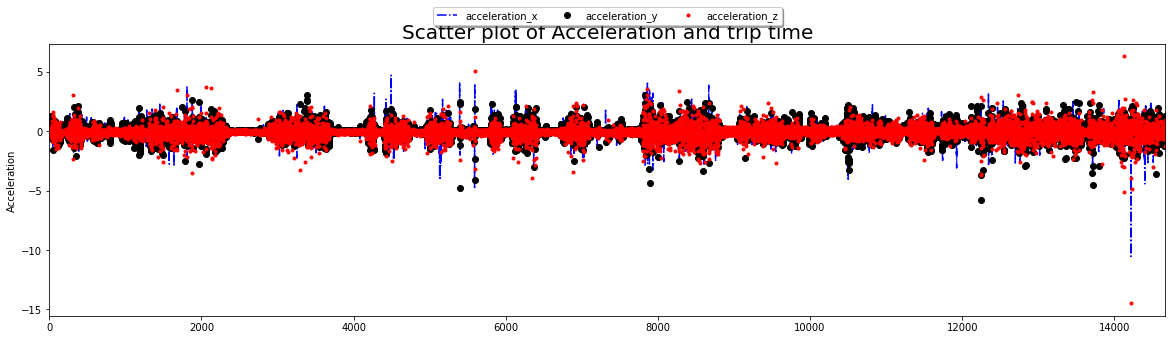

In [55]:
cols = ['acceleration_x', 'acceleration_y', 'acceleration_z']
motion_df[cols].plot(style=['b-.', 'ko', 'r.'], figsize=(20, 5))
plt.ylabel('Acceleration')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True, ncol=3)
plt.title('Scatter plot of Acceleration and trip time', fontsize=20, loc='center')

Text(0.5,1,u"Scatter plot of Gyroscope's reading and trip time")

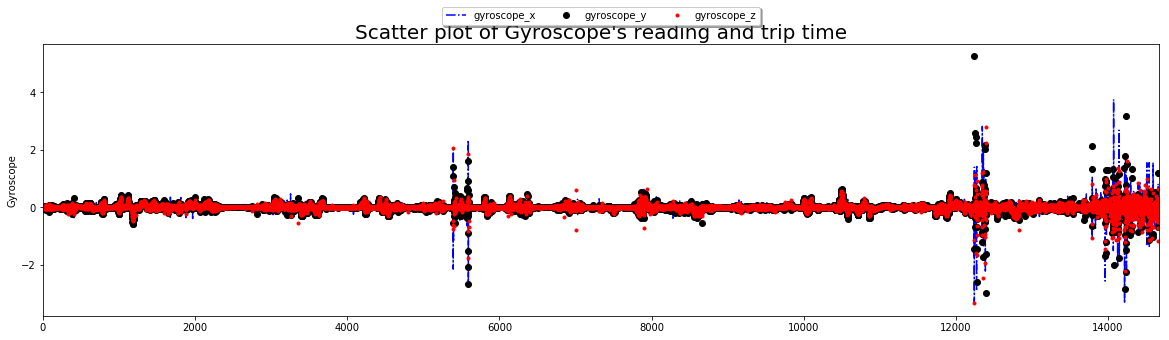

In [56]:
cols = ['gyroscope_x', 'gyroscope_y', 'gyroscope_z']
motion_df[cols].plot(style=['b-.', 'ko', 'r.'], figsize=(20, 5))
plt.ylabel('Gyroscope')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True, ncol=3)
plt.title("Scatter plot of Gyroscope's reading and trip time", fontsize=20, loc='center')

In [5]:
gps_df = pd.read_csv(GPS_FN)

print(gps_df.shape)
gps_df.head()

(2433, 11)


,Unnamed: 0,vertical_accuracy,course,driver_id,horizontal_accuracy,latitude,timestamp,altitude,raw_speed,heading,longitude
0,1,3,273,NzUxNWQwMjBk,10,32.729043,1475693909188,-3,7.860000,149,-117.186911
1,2,3,273,NzUxNWQwMjBk,10,32.729047,1475693910000,-3,6.409999,241,-117.186987
2,3,3,273,NzUxNWQwMjBk,10,32.729050,1475693911000,-3,6.030000,241,-117.187045
3,4,3,273,NzUxNWQwMjBk,10,32.729054,1475693912000,-3,5.800000,241,-117.187111
4,5,3,273,NzUxNWQwMjBk,10,32.729057,1475693913000,-3,6.420000,241,-117.187174


In [6]:
gps_df.drop('Unnamed: 0', axis=1, inplace=True)
gps_df['timestamp'] = pd.to_datetime(gps_df['timestamp'], unit='ms')
start = gps_df.loc[0, 'timestamp']
gps_df['time_diff'] = gps_df['timestamp'].apply(lambda x: int(((x - start).total_seconds())*1000))

gps_df.head()

,vertical_accuracy,course,driver_id,horizontal_accuracy,latitude,timestamp,altitude,raw_speed,heading,longitude,time_diff
0,3,273,NzUxNWQwMjBk,10,32.729043,2016-10-05 18:58:29.188,-3,7.860000,149,-117.186911,0
1,3,273,NzUxNWQwMjBk,10,32.729047,2016-10-05 18:58:30.000,-3,6.409999,241,-117.186987,812
2,3,273,NzUxNWQwMjBk,10,32.729050,2016-10-05 18:58:31.000,-3,6.030000,241,-117.187045,1812
3,3,273,NzUxNWQwMjBk,10,32.729054,2016-10-05 18:58:32.000,-3,5.800000,241,-117.187111,2812
4,3,273,NzUxNWQwMjBk,10,32.729057,2016-10-05 18:58:33.000,-3,6.420000,241,-117.187174,3812


In [12]:
motion_df['time_diff'].max(), gps_df['time_diff'].max()

(2934675, 2934812)

In [14]:
gps_time_diffs = gps_df['time_diff'].values.tolist()

motion_gps_map = {}
motion_keys = set()
i = 1
while len(motion_gps_map) < motion_df.shape[0]:
    mask = motion_df['time_diff'] < gps_time_diffs[i]
    keys = motion_df.loc[mask, 'time_diff'].tolist()
    keys = list(set(keys) - motion_keys)
    values = [gps_time_diffs[i-1]]*len(keys)
    motion_gps_map.update(dict(zip(keys, values)))
    motion_keys = motion_keys.union(set(keys))
    i += 1

In [15]:
len(motion_gps_map), len(motion_keys)

(14671, 14671)

In [27]:
motion_gps_map[1622]

812L

In [28]:
motion_df['gps_ts_key'] = motion_df['time_diff'].map(motion_gps_map)
motion_df.head()

,timestamp,proximity,driver_id,pitch,gyroscope_y,gyroscope_x,gyroscope_z,acceleration_z,acceleration_y,acceleration_x,yaw,roll,time_diff,gps_ts_key
0,2016-10-05 18:58:29.361,-1,NzUxNWQwMjBk,0.040626,-0.028548,-0.008259,-0.001406,-0.183663,0.264476,0.326080,1.583115,0.747436,0,0
1,2016-10-05 18:58:29.541,-1,NzUxNWQwMjBk,-0.439603,-0.018676,0.002345,0.004972,-0.368844,0.235645,-0.011001,2.124577,0.646496,180,0
2,2016-10-05 18:58:29.721,-1,NzUxNWQwMjBk,-0.448445,0.004903,-0.017983,-0.003556,0.112644,0.226058,0.180560,2.116543,0.655507,360,0
3,2016-10-05 18:58:29.901,-1,NzUxNWQwMjBk,-0.455960,0.009423,0.004332,-0.006797,-0.004901,0.102609,0.219669,2.109604,0.657661,540,0
4,2016-10-05 18:58:30.082,-1,NzUxNWQwMjBk,-0.460388,-0.004245,0.011762,-0.006854,-0.065030,0.098155,0.217536,2.105369,0.662631,721,0


In [29]:
gps_df['course'].unique()

array([273, 274, 275, 272, 278, 283, 290, 298, 301, 305, 306, 309, 313,
       318, 319, 322, 325, 326, 323, 320, 317, 316, 315, 297, 292, 291,
       288, 287, 285, 286, 267, 261, 259, 260, 271, 293, 302, 307, 310,
       314, 321, 300, 324, 345, 336, 257, 281, 279, 270, 248, 217, 190,
       178, 179, 180, 181, 174, 163, 139, 110,  97,  92,  88,  87,  90,
       100, 125, 164, 202, 230, 256, 268, 264, 246, 228, 214, 200, 185,
       173, 165, 155, 142, 108, 104,  95,  96,  93,  89,  91,  94,  78,
        70,  40,  35,  18,   8, 357, 342, 331, 312, 303, 289, 282, 251,
       249, 250, 258, 255, 254, 252, 266, 269, 253, 227, 211, 197, 191,
       176, 168, 161, 158, 157, 151, 147, 133, 127, 121, 112, 102,  98,
        81,  73,  68,  60,  47,  45,  38,  27,   9, 359, 347, 333, 296,
       265, 240, 225, 208, 193, 160, 152, 145, 135, 130, 120, 113,  86,
        85,  83,  79,  80,  82,  84,  69,  67,  75, 137, 182, 183, 203,
       238, 236, 232, 221, 213, 199, 195, 205, 234, 299, 229, 21